# **КТ1 Методы корреляционного анализа**

1) загрузите БД Innovations.xlsx и подготовьте ее к работе (БД вы найдет в папке на GD, там же будет доп. документ с описанием исходных переменных)

1.1 - переведите названия колонок на русский язык

1.2 - проверьте уровень измерения переменных, если есть числовие переменные не обозначенные так автоматически, выполните настройку вручную

1.3 - проверьте наличие пропусков, сделайте вывод о пригодности данных для дальнейшего анализа

2) опишите имеющиеся в БД показатели

2.1 - расчитайте значения описательных статистик для всех переменных (среднее арифметическое, стандартная ошибка среднего, медиана, мода, стандартное отклонение, минимум, максимум, асимметрия, эксцесс)

2.2 - проверьте характер распределения для всех переменных(эмпирическое значение критерия Шапиро-Уилка, p-значение критерия Шапиро-Уилка,эмпирическое значение критерия Колмогорова-Смирнова, p-значение Колмогорова-Смирнова ).

**!Матрица описательных статистик должна быть типа DataFrame!**

2.3 - добавить столбец, где будет указано, какая шкала относится к нормальному расспределению, какая нет для показателей Patents, Employees, Students

3) проведите преодразование исходных данных

3.1 - создайте новую переменную, в которой будет учитываться доля сотрудников, имеющих ученую степень относительно, от сотрудников, занятых научными исследованиями и разработками в целом.

3.2 - создайте новую переменную, в которой будет отражаться принадлежность территории к соответствующему федеральному округу

3.3 - создайте новую переменную, которая будет отражать две группы территорий по удельному весу инновационных товаров, услуг и работ в общем объеме отгруженных товаров, предоставленных услуг и выполненных работ: группа 1 - менее 10%; группа 2 - более 10%

4) представьте результаты выше проведенного анализа графически

4.1 - для всех показателей блока "1.	Научно-технический потенциал" приведите гистограмму или диаграмму рассеяния (точечная диаграмма), наложите на них кривую нормального распределения

4.2 - для всех показателей блока "2.	Кадровый потенциал" постройте коробчатый график (ящик с усами), оцените распределение данных и наличие очевидных выбросов

5) проверьте гипотезу о различии средних значений показателей в группах где удельный вес инновационных товаров, услуг и работ меньше 10% и больше 10%

5.1 - для одного из показателей инвестиционного потенциала

5.2 - для одного из показателей научно-технического потенциала

6) проверьте налие связей между всеми имеющимися данными

6.1 - представьте связи в виде таблице, в которой на пересеченье параметров указано значение коэфицента связи

6.2 - сделайте из таблицы коэфицентов связи тепловую матри

In [42]:
import pandas as pd

df = pd.read_excel('Innovations.xlsx')

In [43]:
df.head()

,Субъект РФ,Potential,Patients,Technologies,Organizations,Employes,Researchers,Students,Research costs,Organizational expenses,Products
0,Белгородская область,0.4088,261,2408,21.507761,1655,489,316,1921.0,23852.3910,11.6
1,Брянская область,0.3197,147,1603,14.326648,688,78,223,977.7,1466.8642,7.3
2,Владимирская область,0.3530,292,6728,24.873096,5365,308,197,5391.3,6077.5891,8.1
3,Воронежская область,0.4089,594,2538,21.301775,10654,947,373,8164.5,13518.6942,6.1
4,Ивановская область,0.3226,448,933,13.705584,574,233,260,585.7,253.3257,0.2


# Задание 1:


In [44]:
#----Задание 1.1:

#Создадим словарь с переведенными заголовками таблицы
translation_dict = {'Potential': 'Потенциал', 'Patients': 'Патенты', 'Technologies': 'Технологии', 'Organizations': 'Организации', 'Employes': 'Сотрудники', 'Researchers': 'Исследователи', 'Students': 'Студенты', 'Research costs': 'Затраты на исследования', 'Organizational expenses': 'Организационные расходы', 'Products': 'Продукты'}
#Собственно, переименовываем колонки датафрейма
df = df.rename(columns=translation_dict)
df.head()

,Субъект РФ,Потенциал,Патенты,Технологии,Организации,Сотрудники,Исследователи,Студенты,Затраты на исследования,Организационные расходы,Продукты
0,Белгородская область,0.4088,261,2408,21.507761,1655,489,316,1921.0,23852.3910,11.6
1,Брянская область,0.3197,147,1603,14.326648,688,78,223,977.7,1466.8642,7.3
2,Владимирская область,0.3530,292,6728,24.873096,5365,308,197,5391.3,6077.5891,8.1
3,Воронежская область,0.4089,594,2538,21.301775,10654,947,373,8164.5,13518.6942,6.1
4,Ивановская область,0.3226,448,933,13.705584,574,233,260,585.7,253.3257,0.2


In [45]:
#----Задание 1.2:

print('Типы данных переменных:')
df.dtypes

#Поскольку все колонки, кроме «Субъект РФ» имеют типы данных float64 или int.
#«Субъект РФ» имеет тип object, но это логично, поскольку мы имеем здесь названия субъектов

Типы данных переменных:


Субъект РФ                  object
Потенциал                  float64
Патенты                      int64
Технологии                   int64
Организации                float64
Сотрудники                   int64
Исследователи                int64
Студенты                     int64
Затраты на исследования    float64
Организационные расходы    float64
Продукты                   float64
dtype: object

In [46]:
#----Задание 1.3:

missing_values = df.isna().sum()
print('Пропуски в данных:')
print(missing_values)

if missing_values.sum() == 0:
    print("\nДанные пригодны для дальнейшего анализа: пропуски отсутствуют.")
else:
    print("\nДанные содержат пропуски и могут потребовать обработки перед анализом.")

Пропуски в данных:
Субъект РФ                 0
Потенциал                  0
Патенты                    0
Технологии                 0
Организации                0
Сотрудники                 0
Исследователи              0
Студенты                   0
Затраты на исследования    0
Организационные расходы    0
Продукты                   0
dtype: int64

Данные пригодны для дальнейшего анализа: пропуски отсутствуют.


# Задание 2

In [47]:
#----Задание 2.1:


from scipy.stats import mode, skew, kurtosis

# Выбор только числовых столбцов
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Расчет описательных статистик для всех переменных
descriptive_stats = numeric_columns.describe()

# Расчет моды для всех переменных
modes = numeric_columns.mode()

# Расчет стандартной ошибки среднего
std_err = numeric_columns.sem()

# Расчет асимметрии для всех переменных
skewness = numeric_columns.apply(skew)

# Расчет эксцесса для всех переменных
kurt = numeric_columns.apply(kurtosis)

# Добавление стандартной ошибки среднего, моды, асимметрии и эксцесса в таблицу описательных статистик
descriptive_stats.loc['std_err'] = std_err
descriptive_stats.loc['mode'] = modes.iloc[0]
descriptive_stats.loc['skewness'] = skewness
descriptive_stats.loc['kurtosis'] = kurt

print("Описательные статистики для всех числовых переменных:")
print(descriptive_stats)

Описательные статистики для всех числовых переменных:
          Потенциал      Патенты    Технологии  Организации    Сотрудники  \
count     75.000000    75.000000     75.000000    75.000000     75.000000   
mean       0.338047   268.160000   2689.720000    18.596470   5343.626667   
std        0.075817   334.939448   2920.260612     6.729077  11373.609042   
min        0.164600     2.000000     24.000000     3.030303    114.000000   
25%        0.290600    68.000000    832.500000    13.912429    641.000000   
50%        0.334700   161.000000   1750.000000    17.894737   1739.000000   
75%        0.384850   348.500000   3171.500000    22.256947   5692.000000   
max        0.537500  2207.000000  16819.000000    36.398467  86579.000000   
std_err    0.008755    38.675476    337.202650     0.777007   1313.311248   
mode       0.373900    13.000000   1603.000000     3.030303   1655.000000   
skewness   0.169813     3.108009      2.300035     0.409933      5.420583   
kurtosis   0.053796   

In [48]:
#----Задание 2.2:

from scipy.stats import shapiro, kstest

# Выбор только числовых столбцов
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Создание DataFrame для результатов тестов
distribution_results = pd.DataFrame(index=['Shapiro-Wilk Test Statistic', 'Shapiro-Wilk p-value',
                                           'Kolmogorov-Smirnov Test Statistic', 'Kolmogorov-Smirnov p-value'],
                                    columns=numeric_columns.columns)

# Проверка характера распределения для всех числовых переменных
for column in numeric_columns:
    # Выполнение теста Шапиро-Уилка
    shapiro_stat, shapiro_p = shapiro(numeric_columns[column])

    # Выполнение теста Колмогорова-Смирнова
    ks_stat, ks_p = kstest(numeric_columns[column], 'norm')

    # Заполнение DataFrame результатами
    distribution_results.loc['Shapiro-Wilk Test Statistic', column] = shapiro_stat
    distribution_results.loc['Shapiro-Wilk p-value', column] = shapiro_p
    distribution_results.loc['Kolmogorov-Smirnov Test Statistic', column] = ks_stat
    distribution_results.loc['Kolmogorov-Smirnov p-value', column] = ks_p

print("Результаты тестов на нормальность:")
print(distribution_results)

Результаты тестов на нормальность:
                                  Потенциал   Патенты Технологии Организации  \
Shapiro-Wilk Test Statistic        0.987275  0.688194   0.758771    0.980103   
Shapiro-Wilk p-value               0.659336       0.0        0.0    0.285997   
Kolmogorov-Smirnov Test Statistic  0.565371  0.985317        1.0    0.998778   
Kolmogorov-Smirnov p-value              0.0       0.0        0.0         0.0   

                                  Сотрудники Исследователи  Студенты  \
Shapiro-Wilk Test Statistic         0.425035      0.529564  0.973906   
Shapiro-Wilk p-value                     0.0           0.0  0.123615   
Kolmogorov-Smirnov Test Statistic        1.0           1.0       1.0   
Kolmogorov-Smirnov p-value               0.0           0.0       0.0   

                                  Затраты на исследования  \
Shapiro-Wilk Test Statistic                      0.402866   
Shapiro-Wilk p-value                                  0.0   
Kolmogorov-Smirnov T

In [49]:
#----Задание 2.3:

# Фильтруем числовые столбцы
numeric_columns = df.select_dtypes(include=['number']).columns

# Создадим список списков для хранения результатов
results_data = []

# Проходим по каждой переменной и вычисляем статистики
for column in numeric_columns:
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p_value = shapiro(df[column])

    # Определяем распределение
    distribution = 'Normal' if shapiro_p_value > 0.05 else 'Non-Normal'

    # Добавляем результаты в список
    results_data.append([column, shapiro_stat, shapiro_p_value, distribution])

# Создаем DataFrame из списка списков
results = pd.DataFrame(results_data, columns=['Variable', 'Shapiro-Wilk Test Statistic', 'Shapiro-Wilk Test p-value',
                                              'Нормальное распределение'])
df = df.join(results['Нормальное распределение'])

print(df.head(5))

             Субъект РФ  Потенциал  Патенты  Технологии  Организации  \
0  Белгородская область     0.4088      261        2408    21.507761   
1      Брянская область     0.3197      147        1603    14.326648   
2  Владимирская область     0.3530      292        6728    24.873096   
3   Воронежская область     0.4089      594        2538    21.301775   
4    Ивановская область     0.3226      448         933    13.705584   

   Сотрудники  Исследователи  Студенты  Затраты на исследования  \
0        1655            489       316                   1921.0   
1         688             78       223                    977.7   
2        5365            308       197                   5391.3   
3       10654            947       373                   8164.5   
4         574            233       260                    585.7   

   Организационные расходы  Продукты Нормальное распределение  
0               23852.3910      11.6                   Normal  
1                1466.8642       7.3

# Задание 3

In [50]:
#----Задание 3.1:
frac = df['Сотрудники'].sum() / df['Исследователи'].sum()
print('Доля сотрудников относительно исследователей:', round(frac,2))

Доля сотрудников относительно исследователей: 7.77


In [51]:
#----Задание 3.3:

def assign_group(share):
    if share < 10:
        return 'Группа 1'
    else:
        return 'Группа 2'
    
df['Группа'] =  df['Продукты'].apply(lambda x: assign_group(x))
df.head(5)

,Субъект РФ,Потенциал,Патенты,Технологии,Организации,Сотрудники,Исследователи,Студенты,Затраты на исследования,Организационные расходы,Продукты,Нормальное распределение,Группа
0,Белгородская область,0.4088,261,2408,21.507761,1655,489,316,1921.0,23852.3910,11.6,Normal,Группа 2
1,Брянская область,0.3197,147,1603,14.326648,688,78,223,977.7,1466.8642,7.3,Non-Normal,Группа 1
2,Владимирская область,0.3530,292,6728,24.873096,5365,308,197,5391.3,6077.5891,8.1,Non-Normal,Группа 1
3,Воронежская область,0.4089,594,2538,21.301775,10654,947,373,8164.5,13518.6942,6.1,Normal,Группа 1
4,Ивановская область,0.3226,448,933,13.705584,574,233,260,585.7,253.3257,0.2,Non-Normal,Группа 1


# Задание 4

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


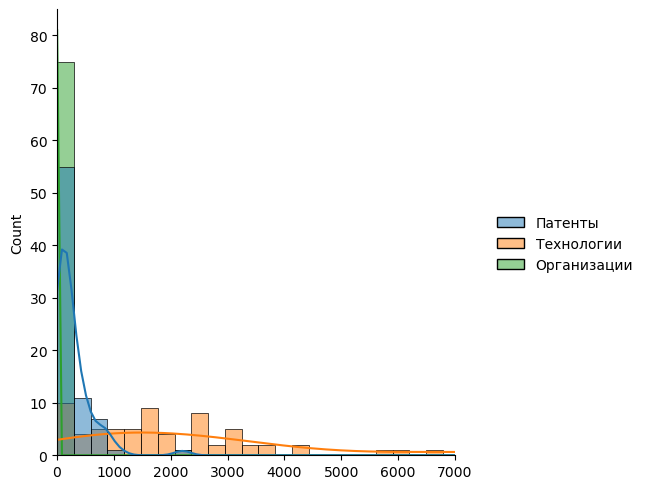

In [92]:
#----Задание 4.1:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

sel_col = ['Патенты', 'Технологии', 'Организации']
#sns.pairplot(df[sel_col], diag_kind='kde')
sns.displot(df[sel_col], kde=True)
plt.xlim(0,7000)

plt.show()


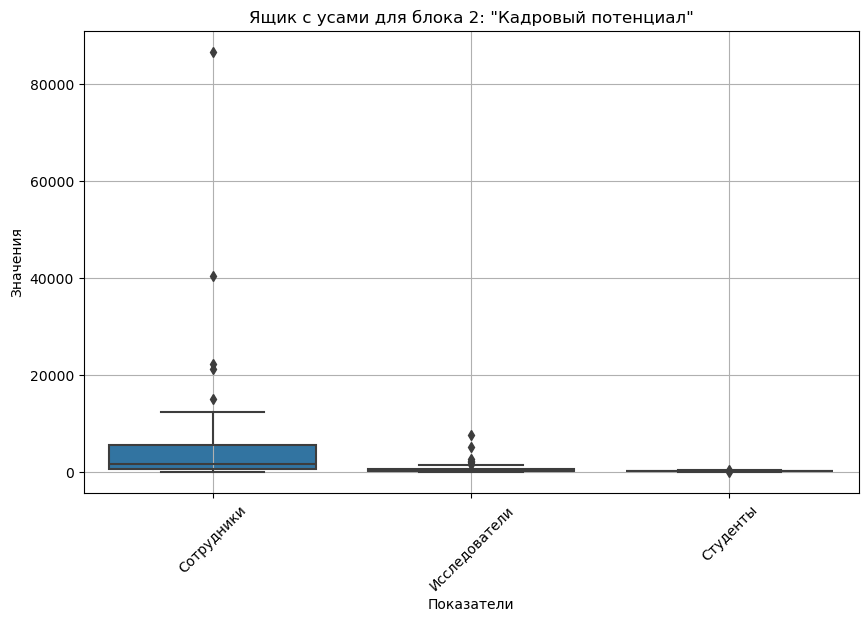

In [77]:
plt.figure(figsize=(10,6))
sl_col = ['Сотрудники', 'Исследователи', 'Студенты']
sns.boxplot(df[sl_col])
plt.title('Ящик с усами для блока 2: "Кадровый потенциал"')
plt.xlabel('Показатели')
plt.ylabel('Значения')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

В ящике для показателя «сотрудники» по меньшей мере 5 очевидных выбросов, для показателя «исследователи» примерно так же, для «студентов» около 2.

У показателя «сотрудники» ящик скошен, что укакзывает на смещенное распределение. Аналогично у «исследователи». В случае «студенты» все более-менее симметрично.

У сотрудников размах усов большой, что означает серьезный разброс данных, у исследователей и студентов размах уже гораздо меньше.

У сотрудников медиана явно смещена вниз, что означает, что даные имеют положительное смещение. Нижний квартиль ближе к медиане, чем верхний. Данные смещены в сторону более высоких значений.

# Задание 5

In [ ]:
#----Задание 5.1:
from scipy import stats

group1_invest = df[df['Группа'] == 'Группа 1']['Затраты на исследования']
group2_invest = df[df['Группа'] == 'Группа 2']['Затраты на исследования']

t_statistic, p_value = stats.ttest_ind(group1_invest, group2_invest)
alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средние значения различны.')
else: 
    print('Нулевая гипотеза не отвергается: нет достаточных доказательств различий в средних значениях.')

Отвергаем нулевую гипотезу: средние значения различны.


In [ ]:
#----Задание 5.2:
group1_tech = df[df['Группа'] == 'Группа 1']['Технологии']
group2_tech = df[df['Группа'] == 'Группа 2']['Технологии']

t_statistic, p_value = stats.ttest_ind(group1_tech, group2_tech)
alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средние значения различны.')
else: 
    print('Нулевая гипотеза не отвергается: нет достаточных доказательств различий в средних значениях.')

Отвергаем нулевую гипотезу: средние значения различны.


# Задание 6

In [20]:
#----Задание 6.1:
selected_columns = ['Потенциал', 'Патенты', 'Технологии', 'Организации', 'Сотрудники', 'Исследователи', 'Студенты', 'Затраты на исследования', 'Организационные расходы', 'Продукты']

corr_matrix = df[selected_columns].corr()
#print(corr_matrix)

corr_table = corr_matrix.unstack().sort_values(ascending=False).reset_index()
corr_table.columns=['Параметр 1', 'Параметр 2', 'Коэффициент связи']
print(corr_table)

                 Параметр 1               Параметр 2  Коэффициент связи
0                 Потенциал                Потенциал           1.000000
1                   Патенты                  Патенты           1.000000
2   Организационные расходы  Организационные расходы           1.000000
3   Затраты на исследования  Затраты на исследования           1.000000
4                  Студенты                 Студенты           1.000000
..                      ...                      ...                ...
95  Организационные расходы                 Студенты           0.034684
96  Затраты на исследования                 Студенты          -0.005171
97                 Студенты  Затраты на исследования          -0.005171
98               Сотрудники                 Студенты          -0.022692
99                 Студенты               Сотрудники          -0.022692

[100 rows x 3 columns]


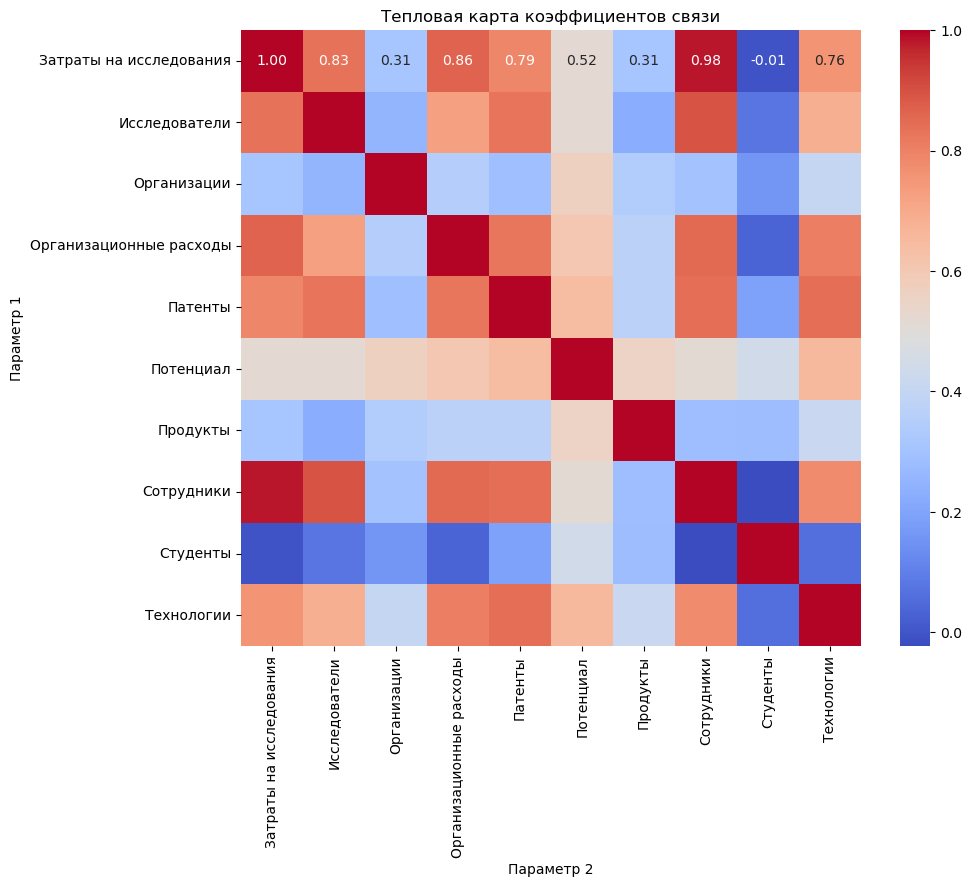

In [70]:
#----Задание 6.2:


# Преобразование столбца "Коэффициент связи" в числовой формат
corr_table['Коэффициент связи'] = pd.to_numeric(corr_table['Коэффициент связи'], errors='coerce')

# Преобразование таблицы коэффициентов связи в тепловую карту
heatmap_data = corr_table.pivot_table(index='Параметр 1', columns='Параметр 2', values='Коэффициент связи')

# Создание тепловой карты с отображением значений коэффициентов в каждой ячейке
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Тепловая карта коэффициентов связи')
plt.xlabel('Параметр 2')
plt.ylabel('Параметр 1')
plt.show()
